In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../')

In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Dataset Augmentation

### Loading the dataset

In [5]:
from cpe775.dataset import FaceLandmarksDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import Compose
from cpe775.transforms import ToTensor, CropFace, ToGray

In [6]:
# load the dataset
dataset = FaceLandmarksDataset(csv_file='../data/train.csv',
                               root_dir='../data/')

### Random flip

In [7]:
from torchvision import transforms
import torchvision.transforms.functional as F
import random

In [8]:
class RandomHorizontalFlip(transforms.RandomHorizontalFlip):
    """Horizontally flip the given PIL Image randomly with a probability of 0.5."""
    
    _horizontal_flip_indexes = np.array([
        [1,2,3,4,5,6,7,8,18,19,20,21,22,37,38,39,40,41,42,32,33,49,50,51,61,62,68,60,59],
        [17,16,15,14,13,12,11,10,27,26,25,24,23,46,45,44,43,48,47,36,35,55,54,53,65,64,66,56,57]
    ]) - 1

    def __call__(self, sample):
        """
        Args:
            sample: a dict containing the `image` (PIL image) and the landmarks.
        Returns:
            dict: Randomly flipped image and landmarks
        """
        image, landmarks = sample['image'], sample['landmarks']
        
        if random.random() < 1.0:
            
            w, h = image.size
            
            # Horizontal flip of all x coordinates:
            landmarks = landmarks.copy()
            landmarks[..., 0] = (landmarks[..., 0] - 0.5)* -1 + .5
            
            flipped_landmarks = landmarks.copy()
            
            flipped_landmarks[..., self._horizontal_flip_indexes[0], :] = landmarks[..., self._horizontal_flip_indexes[1], :]
            flipped_landmarks[..., self._horizontal_flip_indexes[1], :] = landmarks[..., self._horizontal_flip_indexes[0], :]
            return {'image': F.hflip(image), 'landmarks': flipped_landmarks}
        return sample

### Testing the random flip

In [9]:
from cpe775.utils.img_utils import show_landmarks

In [10]:
flip = RandomHorizontalFlip()

In [11]:
len(flip._horizontal_flip_indexes[0])

29

In [12]:
len(flip._horizontal_flip_indexes[1])

29

In [13]:
idx = 49

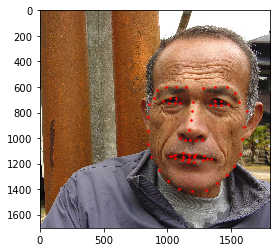

In [14]:
image = dataset[idx]['image']
landmarks = dataset[idx]['landmarks']

w,h = image.size

landmarks /= np.array([w,h])

sample = flip({'image': image, 'landmarks': landmarks})

show_landmarks(sample['image'], sample['landmarks'], normalized=True)

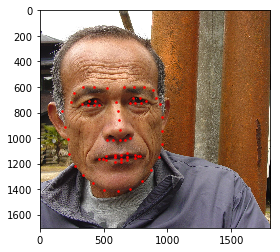

In [15]:
show_landmarks(image, landmarks, normalized=True)

#### Random flip using the class

In [81]:
from cpe775.transforms import RandomHorizontalFlip

[autoreload of cpe775.transforms failed: Traceback (most recent call last):
  File "/home/igor.quintanilha/miniconda3/envs/dsc/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/igor.quintanilha/miniconda3/envs/dsc/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 385, in superreload
    update_generic(old_obj, new_obj)
  File "/home/igor.quintanilha/miniconda3/envs/dsc/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 324, in update_generic
    update(a, b)
  File "/home/igor.quintanilha/miniconda3/envs/dsc/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 279, in update_class
    if old_obj == new_obj:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
]


In [17]:
flip = RandomHorizontalFlip()

In [18]:
image = dataset[idx]['image']
landmarks = dataset[idx]['landmarks']

w,h = image.size

landmarks /= np.array([w,h])

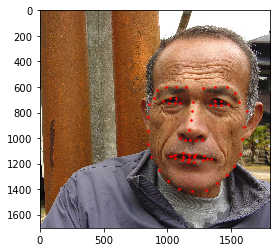

In [19]:
sample = flip({'image': image, 'landmarks': landmarks})

show_landmarks(sample['image'], sample['landmarks'], normalized=True)

## Random Crop

In [184]:
from cpe775.transforms import CropFace, RandomCrop
import torchvision.transforms.functional as F

In [185]:
output_size = (224, 224)

In [203]:
crop_face = CropFace()
random_crop = RandomCrop((224, 224))
face_sample = crop_face(dataset[idx])

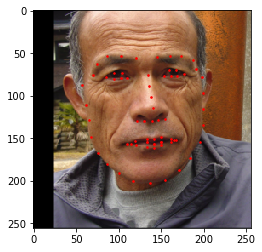

In [204]:
show_landmarks(face_sample['image'], face_sample['landmarks'], normalized=True)

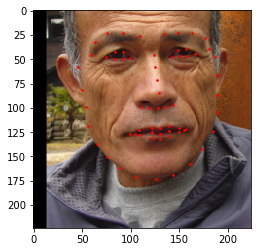

In [205]:
sample = random_crop(face_sample)
image = sample['image']
landmarks = sample['landmarks']
show_landmarks(image, landmarks, normalized=True)

### Center crop for non-training data

In [221]:
from cpe775.transforms import CenterCrop

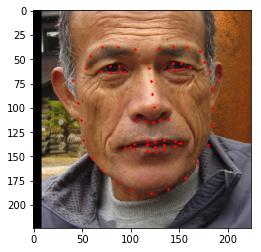

In [222]:
crop_face = CropFace()
center_crop = CenterCrop((224, 224))
face_sample = crop_face(dataset[idx])

sample = center_crop(face_sample)
image = sample['image']
landmarks = sample['landmarks']
show_landmarks(image, landmarks, normalized=True)